# The Random in Random Forests
Random forests (RF) are my default starting point for most of the data science I do at Texas A&M. Random forests are the honey badgers of machine learning. **They don't care**. ![ChessUrl](http://giphygifs.s3.amazonaws.com/media/f8k6R32qjJGV2/giphy.gif "RF doesn't care")
They don't care about normalizing to the mean and standard deviation. They don't care about hyperparameters or tuning. You may not be able to get that last 1% of accuracy versus other methods, but RFs are easy to understand and visualize. 
***
## Weird Practical Statement
There's this prevailing idea in a number of [foundational](https://ieeexplore.ieee.org/document/598994) [papers](https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf) regarding bagging.

*Many low accuracy trees make a better forest than many high accuracy trees.*

From a purely intuitive sense, that's a really weird thing idea. We show the machine lots of different data sets, and ask it to make the best possible prediction on whole by sacraficing the average per tree. Let's take a closer look at variance and accuracy with a really simple [dataset](https://www.kaggle.com/aungpyaeap/fish-market/downloads/fish-market.zip/2).

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [3]:
PATH = "data/fish-market/"

In [4]:
df_raw = pd.read_csv('data/fish-market/Fish.csv')
df_raw

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


This is a really friendly beginner dataset. We've got 7 species of fish with relevant measurements. We can target weight as our output variable for the time being.

In [5]:
df_raw.Weight = np.log(df_raw.Weight) #convert target variable to log scale

C:\Users\tdgri\.julia\conda\3\envs\fastai\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [6]:
df_raw=df_raw.replace([-np.inf], -10) #replace inf w nan
df_raw.iloc[[40],:]

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,-10.0,19.0,20.5,22.8,6.4752,3.3516


In [7]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/fish-raw')

In [8]:
import pandas as pd
df_raw = pd.read_feather('tmp/fish-raw') #lol raw fish sashimis and sushis
df_raw.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,5.488938,23.2,25.4,30.0,11.5200,4.0200
1,Bream,5.669881,24.0,26.3,31.2,12.4800,4.3056
2,Bream,5.828946,23.9,26.5,31.1,12.3778,4.6961
3,Bream,5.894403,26.3,29.0,33.5,12.7300,4.4555
4,Bream,6.063785,26.5,29.0,34.0,12.4440,5.1340


In [9]:
df_raw.iloc[[40],:]

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,-10.0,19.0,20.5,22.8,6.4752,3.3516


Text(0.5, 1.0, 'Width')

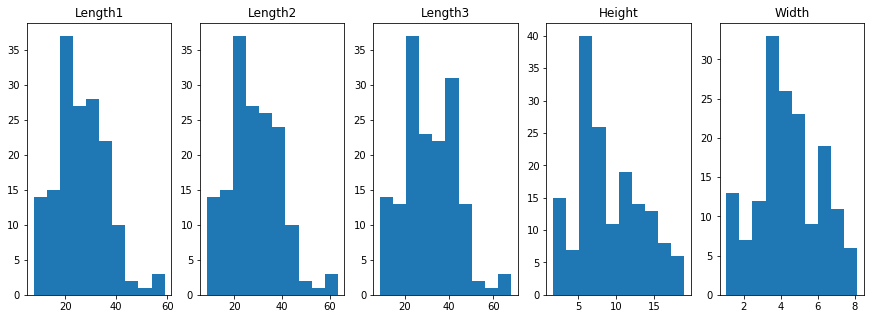

In [10]:
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
axs[0].hist(df_raw.Length1)
axs[0].set_title('Length1')
axs[1].hist(df_raw.Length2)
axs[1].set_title('Length2')
axs[2].hist(df_raw.Length3)
axs[2].set_title('Length3')
axs[3].hist(df_raw.Height)
axs[3].set_title('Height')
axs[4].hist(df_raw.Width)
axs[4].set_title('Width')

In [11]:
train_cats(df_raw)
df, y, nas = proc_df(df_raw, 'Weight')

In [12]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y) #overfit, but proves code is working

C:\Users\tdgri\.julia\conda\3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9256156924025795

In [15]:
msk = np.random.rand(len(df)) < 0.8
X_train = df[msk]
y_train=y[msk]
X_valid = df[~msk]
y_valid = y[~msk]
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((124, 6), (124,), (35, 6), (35,))

In [16]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [17]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

C:\Users\tdgri\.julia\conda\3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 111 ms
[0.43168977480432114, 0.25801007671261267, 0.9490100577111226, 0.9574288560965979]


In [18]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([5.70378, 5.29832, 5.60947, 5.4161 , 5.66988, 5.29832, 4.97673, 5.66988, 5.70378, 5.60947]),
 5.4955739263364425,
 5.488937726156687)

In [19]:
preds.shape

(10, 35)

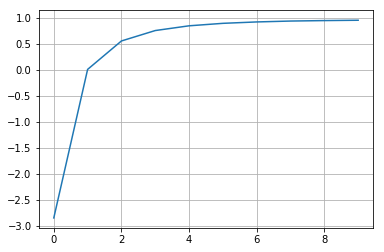

In [20]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);
plt.grid(True)

In [21]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.6958449891666645, 0.12871018005426482, 0.8675152150737305, 0.9894058094519245]


In [22]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.5129785986011487, 0.1759146691101461, 0.9279988405177715, 0.9802099862589243]


In [23]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.4848892966486338, 0.19814429995024002, 0.9356681275749812, 0.9748924028912587]


In [24]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.6216766126505582, 0.2872752042739997, 0.8942525129181114, 0.9472237815733193, 0.4626347833231267]


In [25]:
def dectree_max_depth(tree):
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1

    root_node_id = 0
    return walk(root_node_id)

In [26]:
t=m.estimators_[0].tree_

In [27]:
dectree_max_depth(t)

10

In [28]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[1.091988534133461, 0.4288258749520418, 0.6737299922472062, 0.8824009132728774, 0.40700287019534875]


In [29]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[1.074189716628692, 0.3946206196163268, 0.6842793577090017, 0.9004132561731415, 0.4402369447543125]


In [30]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.5648593284005943, 0.17095243490267092, 0.9126985197861339, 0.9813107201968753]


In [33]:
%time preds = np.stack([t.predict(X_valid) for t in m.estimators_])
np.mean(preds[:,0]), np.std(preds[:,0])

Wall time: 42.5 ms


(5.615443527173437, 0.18225387329603496)

In [32]:
fi = rf_feat_importance(m, X_train); fi[:10]

,cols,imp
2,Length2,0.353500
3,Length3,0.271991
5,Width,0.221419
1,Length1,0.100330
4,Height,0.044298
0,Species,0.008463


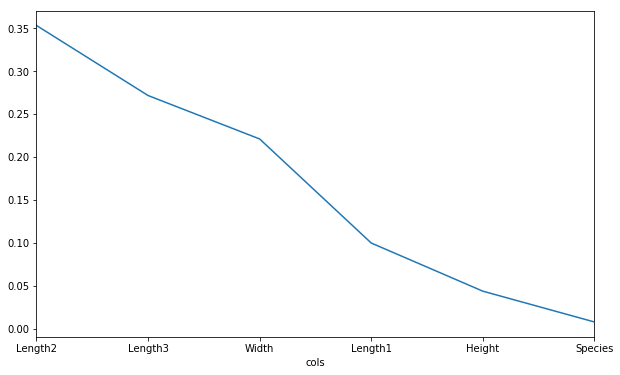

In [34]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

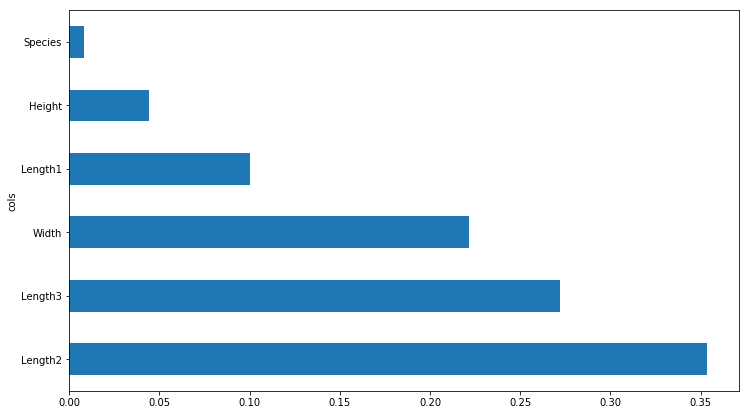

In [38]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)
plot_fi(fi[:7]);